Boosting algoritmasıdır. Kaggle yarışmalarında oldukça başarılıdır. overfiting durumlarında oldukça etkilidir. Yapılan hatayı
Diğer ağaca aktararak gider. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df=pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

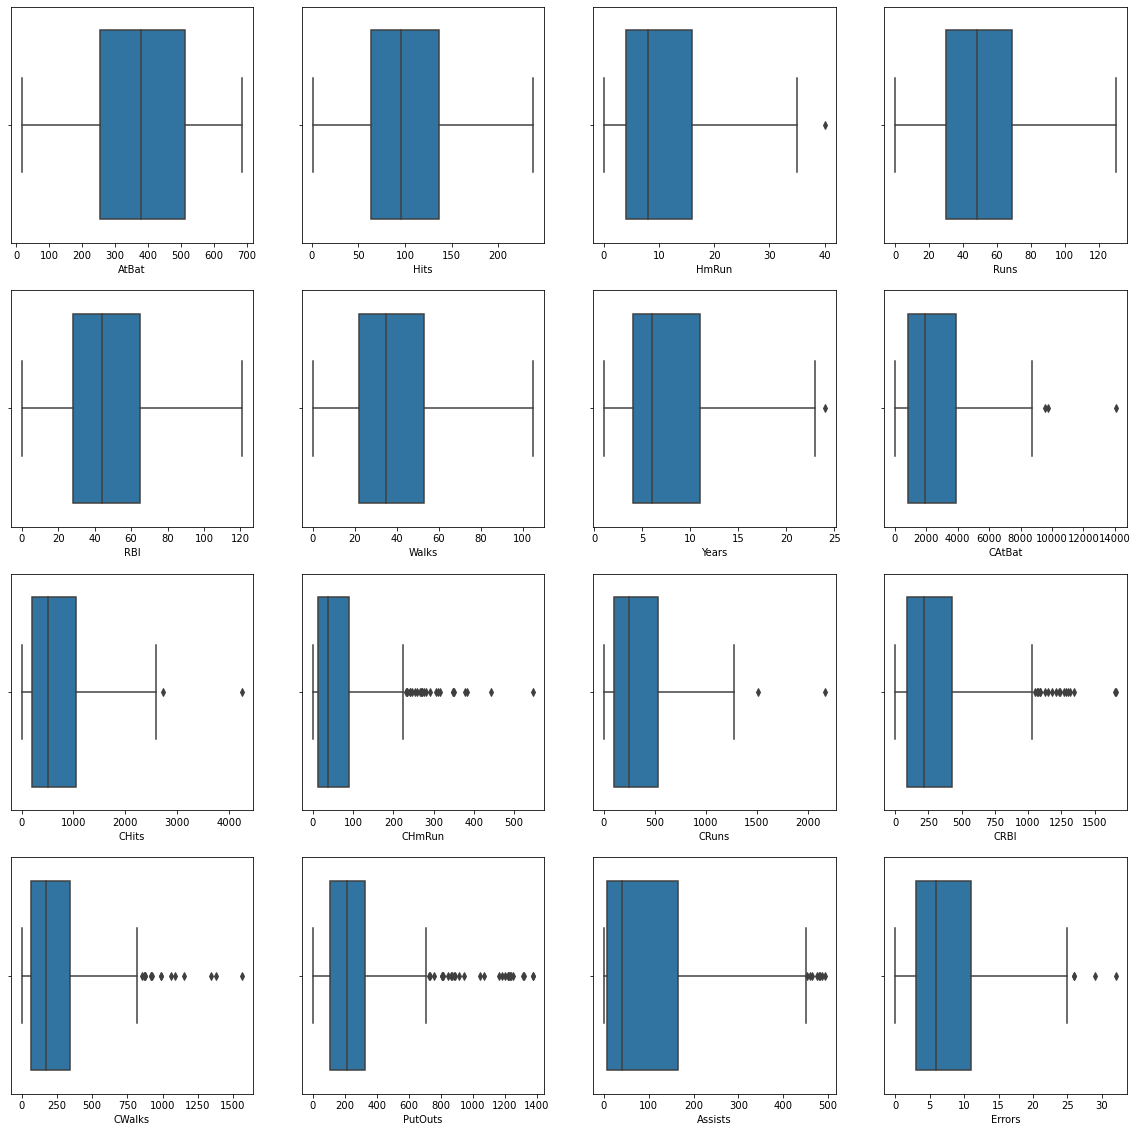

In [4]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes(int).columns:
    index += 1
    plt.subplot(4,4,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.8)

In [5]:
for i in df.select_dtypes([float, int]).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-(1.8*IQR)
    ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
    aykiri_alt = df[i] < alt_sinir
    aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
    df[i][aykiri_alt] = alt_sinir
    df[i][aykiri_ust] = ust_sinir

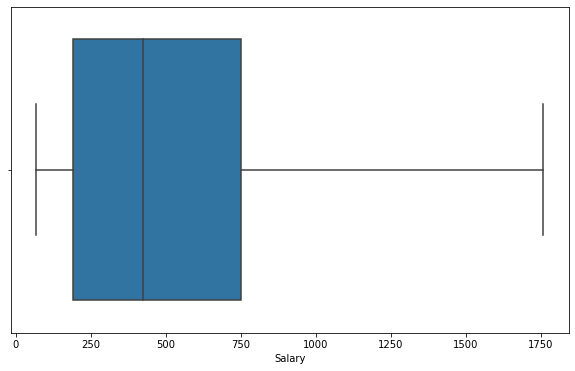

In [7]:
sns.boxplot(df["Salary"], whis=1.8);

In [8]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1-(1.8*IQR)
ust_sinir = Q3+(1.8*IQR)
aykiri_alt = df["Salary"] < alt_sinir
aykiri_ust = df["Salary"] > ust_sinir
df["Salary"][aykiri_alt] = alt_sinir
df["Salary"][aykiri_ust] = ust_sinir
print(f"aykırı alt değer = {alt_sinir}")
print(f"aykırı üst değer = {ust_sinir}")

aykırı alt değer = -818.0
aykırı üst değer = 1758.0


In [9]:
ort = (ust_sinir + alt_sinir)/2
ort

470.0

In [10]:
for i in df.select_dtypes(float).columns[0: ]:
    df[i].fillna(ort, inplace=True)

In [11]:
df[df["Salary"].isna() == True]["Salary"]

Series([], Name: Salary, dtype: float64)

In [12]:
df[df["Salary"] == 470.0]["Salary"]

0      470.0
15     470.0
18     470.0
22     470.0
30     470.0
32     470.0
36     470.0
38     470.0
39     470.0
41     470.0
42     470.0
44     470.0
48     470.0
52     470.0
57     470.0
64     470.0
66     470.0
69     470.0
71     470.0
77     470.0
80     470.0
83     470.0
94     470.0
97     470.0
101    470.0
103    470.0
104    470.0
105    470.0
106    470.0
114    470.0
125    470.0
138    470.0
144    470.0
150    470.0
157    470.0
158    470.0
160    470.0
169    470.0
171    470.0
173    470.0
197    470.0
199    470.0
203    470.0
208    470.0
210    470.0
225    470.0
228    470.0
235    470.0
246    470.0
250    470.0
253    470.0
254    470.0
270    470.0
283    470.0
292    470.0
298    470.0
302    470.0
305    470.0
316    470.0
Name: Salary, dtype: float64

In [13]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [14]:
from sklearn.preprocessing import OrdinalEncoder

cat = X.select_dtypes("object").columns
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 101)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [18]:
from xgboost import XGBRegressor

In [26]:
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train, y_train)
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000000,-0.036117
mae,0.032807,197.602646
mse,0.002313,73754.396722
rmse,0.048098,271.577607


In [27]:
from sklearn.model_selection import cross_validate

model = XGBRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                 0.434069
test_neg_mean_absolute_error         -196.045606
test_neg_mean_squared_error        -83132.837518
test_neg_root_mean_squared_error     -281.608880
dtype: float64

In [28]:
from sklearn.model_selection import cross_validate

model = XGBRegressor(random_state=101)
scores = cross_validate(model, X_test, y_test, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                -0.285760
test_neg_mean_absolute_error         -201.165423
test_neg_mean_squared_error        -59073.679388
test_neg_root_mean_squared_error     -231.393195
dtype: float64

In [44]:
deneme_model = XGBRegressor(random_state=101, min_child_weight = 5.0, gamma = 2.0)
deneme_model.fit(X_train, y_train)
train_val(deneme_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999994,0.030221
mae,0.616309,192.825625
mse,0.931785,69032.269843
rmse,0.965290,262.739928


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 500, 1000],'max_depth':[2,3,4,5,6], "learning_rate": [0.1, 0.01, 0.5],
              "colsample_bytree":[0.5,0.7, 1]}

model = XGBRegressor(random_state=101, min_child_weight = 5.0, gamma = 2.0)

grid_model = GridSearchCV(model, param_grid, scoring = "neg_root_mean_squared_error", cv=5, n_jobs = -1).fit(X_train, y_train)

In [48]:
grid_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

In [49]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.970472,0.074014
mae,41.245356,179.055713
mse,4715.765889,65914.951589
rmse,68.671434,256.739073
